<a href="https://colab.research.google.com/github/FSDAwaesf/Detect-Person-Class-from-img-Collage-project/blob/main/Detect_Person_Class(Collage_project).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import os
import random 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import cv2


In [ ]:
data_path = '/content/drive/MyDrive/Faces data/CroppedYale'
len(os.listdir(data_path))

38

#adding imgs to list with it's labels

In [ ]:
def read_img(path):
  files_names = os.listdir(path) 
  imgs = []
  target = []
  for i in files_names:
    for j in os.listdir(path+'/'+i):
      if '.pgm' in j:
        img = cv2.imread(path+'/'+i+'/'+j)
        imgs.append(img)
        target.append(i)
  return imgs,target

#X ==> Images
#y ==> labels

In [ ]:
X,y = read_img(data_path)
X = np.array(X)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


In [ ]:
y = np.array(y)

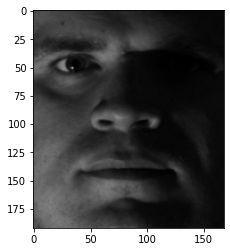

In [ ]:
plt.imshow(X[20])

In [ ]:
y

array(['yaleB04', 'yaleB04', 'yaleB04', ..., 'yaleB38', 'yaleB38',
       'yaleB38'], dtype='<U7')

#all images(192,168)

In [ ]:
def resize_images(images):
  imgs = []
  images1 = np.asarray(images)
  for i in images1:
    img = cv2.resize(i,(168, 192))
    imgs.append(img)

  return imgs

In [ ]:
images = resize_images(X)

In [ ]:
images[1].shape

(192, 168, 3)

#CNN Model 1 ( without augmentation)

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Dropout,Activation,MaxPool2D,Flatten

In [ ]:
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=(3,3),activation='relu',input_shape=(192,168,3)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))

model.add(Dense(units=38,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 190, 166, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 95, 83, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 93, 81, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 46, 40, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 44, 38, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 22, 19, 64)       0

In [ ]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
y.shape
y = np.array(y).reshape(-1,1)

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y = lb.fit_transform(y)
y.shape
y = y.reshape(-1,1)
y.shape

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(2470, 1)

In [ ]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(y)
y.shape

(2470, 38)

In [ ]:
images = np.array(images)
images.shape

(2470, 192, 168, 3)

In [ ]:
train_gen = ImageDataGenerator()

In [ ]:
trainG = train_gen.flow(images,y,batch_size=38)
validG = train_gen.flow(images,y,batch_size=38)

In [ ]:
history = model.fit_generator(trainG,
                                  steps_per_epoch=100, 
                                  epochs=1,
                                  validation_data=validG,
                                  validation_steps=50,
                                  verbose=1,
                                  shuffle = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


100/100 [==============================] - 42s 408ms/step - loss: 8.3275 - accuracy: 0.1620 - val_loss: 2.0865 - val_accuracy: 0.4660
